This asignment is on DFT and DCT. Why do we need to implement DFT
when we already have DTFT? 

**->** DTFT is a continuous function of frequency. For calculation using computers, we need them to be discrete. So DFT is taken as a sampled version of DTFT at some specific values of frequency. 

Modern computers, though are quite powerful
have finite storage and computational power, so we need to find an approxima-
tion to DTFT. The same argument is also valid when it comes to the need to
compress data. How does DCT enables us to achieve this? 

**->** DCT compresses (lossy but still more efficient than DFT) the signal in far fewer coefficients and hence less space is required. 

Why can’t we use DFT?

**->** If we take same number of DFT coefficients and do IDFT to produce an approximation of the signal, the error is much higher. 


**->** DCT is preferred over DFT in image compression algorithms like JPEG because DCT is a real transform which results in a single real number per data point. In contrast, a DFT results in a complex number (real and imaginary parts) which requires double the memory for storage



**• Discrete Fourier Transform:** For a signal x[n] with length N , its N -
point DFT X(k) is defined as follows:
X(k) =
N
−1
X
x[n]e −j(2π/N )kn
k=0
The N -point inverse DFT of X(k) is then given by:
x[n] =
N −1
1 X
X(k)e jk(2π/N )kn
N n=0
Write functions to implement the above equations.

In [ ]:
Fimport numpy as np

def dft(x,N):
  num_coeff=N
  twiddle_power=complex(0,-(2*np.pi)/N)
  Wn=np.exp(twiddle_power)    # defining the twiddle factor Wn

  dft_coeff=[]    # an empty array to store the dft coefficients
  for k in range(num_coeff):  # calculating the N DFT coefficients
    sum=0
    for i in range(N):        # summing over the N signal sampeles
      sum=sum+(x[i]*(Wn**(i*k)))  # multiplying by the twiddle factor
    dft_coeff.append(sum)   # adding the calculated dft coefficient to the list

  dft_coeff=np.array(dft_coeff)
  return dft_coeff

def idft(X,N):
  num_coeff=N
  twiddle_power=complex(0,-(2*np.pi)/N)
  Wn=np.exp(twiddle_power)   # defining the twiddle factor Wn

  xn=[]    # an empty array to store the signal samples
  for i in range(N): # calculating the N samples
    sum=0
    for k in range(num_coeff):        # summing over the N dft coefficients
      sum=sum+(X[k]*(Wn**(-i*k))) # multiplying by the twiddle factor
    xn.append(sum)   # adding the calculated sample to the list

  xn=np.array(xn)/N
  return xn


Write a function to compute the circular convolution of two sequences.
Find the circular convolution of x = [1, 2, 3, 0, 0, 0, 0] and h = [1, 1, 1, 1, 1, 1, 1]
using the function.

In [ ]:
import numpy as np

def cconv(x,h):
  Xk=list(dft(x,np.shape(x)[0])) #dft of x
  Hk=list(dft(h,np.shape(h)[0]))  #dft of h
  cc=idft(np.multiply(Xk,Hk),np.shape(x)[0])  #idft of ( X[k]*H[k] ) is the circular convolution of x[n] and h[n]
  return cc

x = np.array([1, 2, 3, 0, 0, 0, 0])
h = np.array([1, 1, 1, 1, 1, 1, 1])
print(f'Circular Convolution of Input signal(x):{x} and Impulse response(h):{h}:')
print(abs(cconv(x,h)))

Circular Convolution of Input signal(x):[1 2 3 0 0 0 0] and Impulse response(h):[1 1 1 1 1 1 1]:
[6. 6. 6. 6. 6. 6. 6.]


A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is sampled
at 100 times per second for 0.91 seconds and then its DFT is computed. Plot
the spectrum versus frequency in Hz. What is the magnitude of DFT at
35 Hz? Is this value non-zero? If so then why?

In [ ]:
import numpy as np
f=30
start=0
end=0.91
samplesPerSec=100
t=np.linspace(start,end,int((end-start)*samplesPerSec))
#t=np.linspace(0,0.91,91)
x=np.cos(2*np.pi*f*t)     # defining the 30 Hz cosine signal for 0.91 seconds

Xk=dft(x,np.shape(x)[0])  # calculate dft of the signal
N=(end-start)*samplesPerSec
fs=samplesPerSec
F=35
k=int(F*N/fs)     # the index or DFT coefficient for the required frequency  of 35 Hz
print(f'The DFT coefficient for f=35 Hz is : {abs(Xk[k])}')

The DFT coefficient for f=35 Hz is : 4.242989026366235


**Ans** The coefficient for 35 Hz is not zero here although we sampled just a 30Hz sinusoid. If we could compute the DTFT (which is continuous) for the signal we would obtain an impulse at 30 Hz. But DFT is a sampled version of the DTFT. It is discrete. Basically it divides the frequency ranges into a number of bins of resolution Fs/N Hz. So, this will involve some approximations and would never give the exact output of DTFT. However if we take many more samples of the signal (or use a higher sampling frequency) and compute a very high-point DFT, it would resemble the DTFT output much more than the current case.

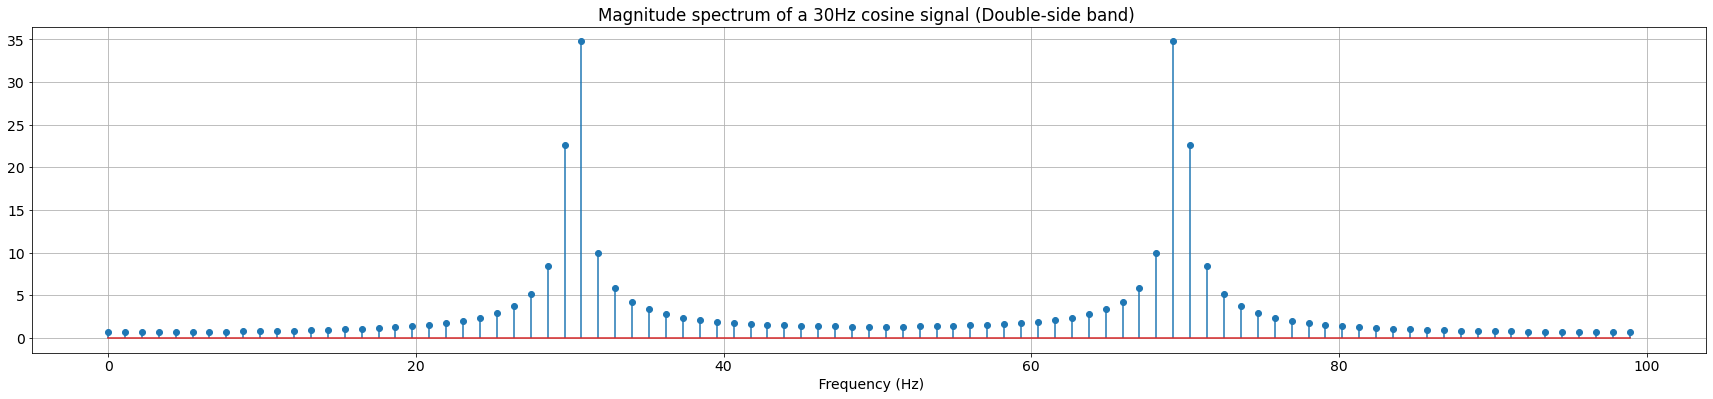

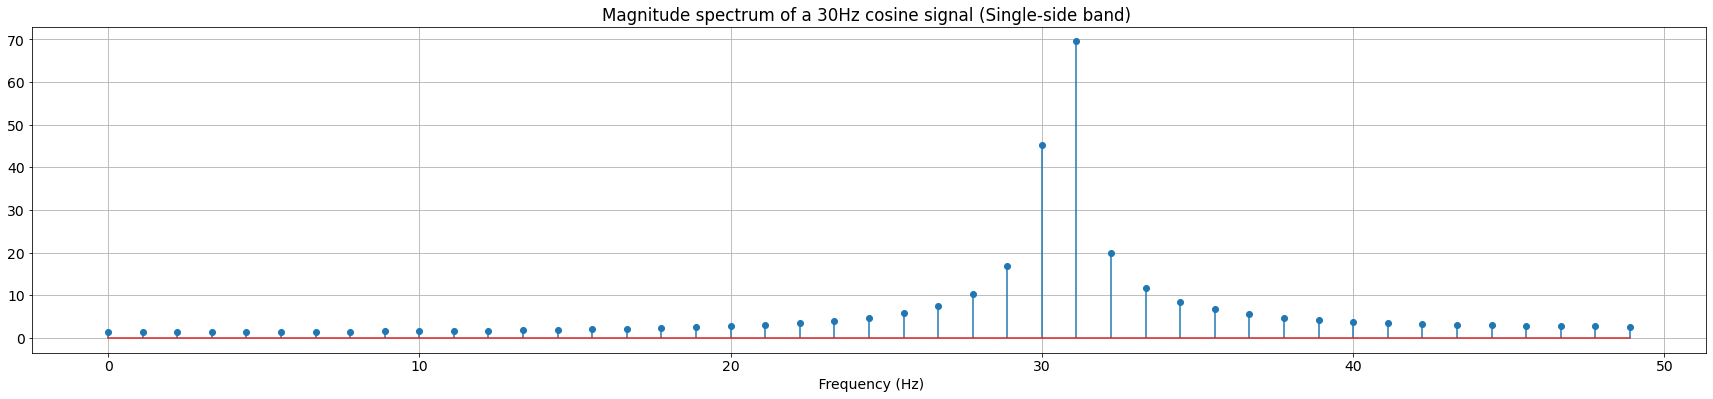

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':14})
plt.figure(figsize=(30,6))
plt.stem(np.arange(0,np.shape(Xk)[0]/0.91,100/91),abs(Xk),use_line_collection=True)
plt.xlabel(' Frequency (Hz)')
plt.title(f'Magnitude spectrum of a 30Hz cosine signal (Double-side band) ')
plt.grid()
plt.show()

SSB=2*Xk[0:int(N/2)]
plt.figure(figsize=(30,6))
plt.stem(np.arange(0,fs/2,50/45),abs(SSB),use_line_collection=True)
plt.xlabel(' Frequency (Hz)')
plt.title(f'Magnitude spectrum of a 30Hz cosine signal (Single-side band) ')
plt.grid()
plt.show()

Consider the two sequences x = [1, −3, 1, 5] and y = [7, −7, −9, −3]. Does
there exist a sequence h such that y is the circular convolution of x and
h. Find h using DFT and IDFT.

Yes. Such an "h" is possible. The impulse response h is:
[-0.0245098  -0.31862745 -0.14215686  0.15196078]


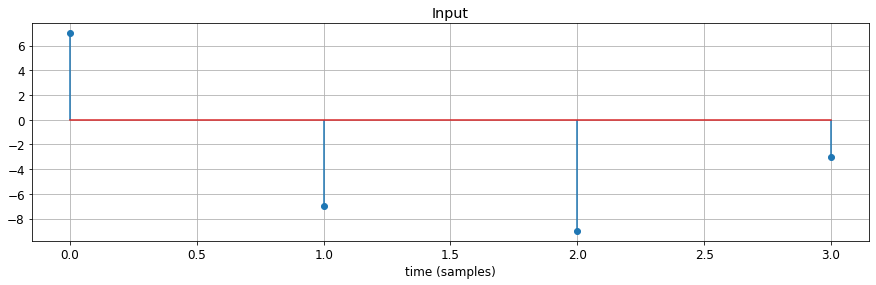

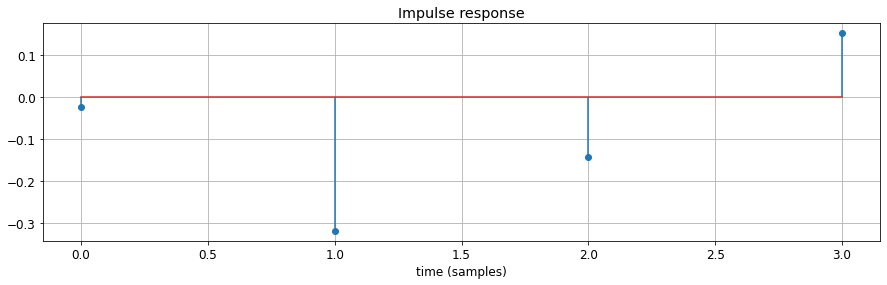

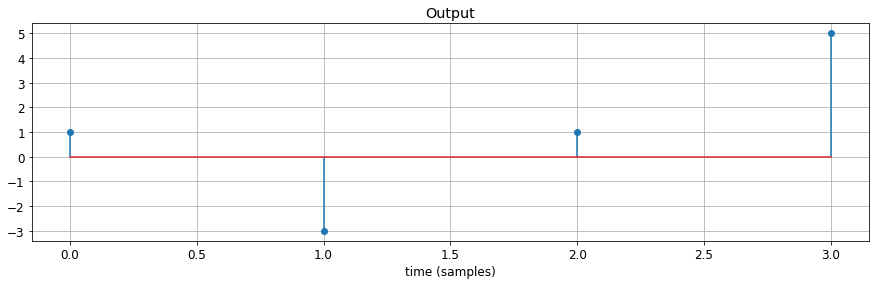

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y= [1, -3, 1, 5] 
x = [7, -7, -9, -3]
X=dft(x,4)  
Y=dft(y,4)
H=Y/X        # Y = H X
h=idft(H,4)
print('Yes. Such an "h" is possible. The impulse response h is:')
print(h.real)

n=np.arange(0,4,1)
plt.rcParams.update({'font.size':12})
plt.figure(figsize=(15,4))
plt.stem(n,x,use_line_collection=True)
plt.xlabel('time (samples)')
plt.title(f'Input')
plt.grid()
plt.show()

plt.figure(figsize=(15,4))
plt.stem(n,h.real,use_line_collection=True)
plt.xlabel('time (samples)')
plt.title(f'Impulse response')
plt.grid()
plt.show()

plt.figure(figsize=(15,4))
plt.stem(n,y,use_line_collection=True)
plt.xlabel('time (samples)')
plt.title(f'Output')
plt.grid()
plt.show()

Compute the energy of the signal x[n] = (3/4)nu[n] for 0 ≤ n ≤ 50. If the
DFT of this signal is X(k) then what is the energy of X(k) and how does
it relate to that of x[n].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def aPowern(a,N):    # returns a sequence of the form a^n u[n] for a length of N samples
  x=[]
  for i in range(N):
    x.append(a**i)
  return np.array(x)

N=51
n=np.arange(0,N,1)
x=aPowern(0.75,N)
E=0
for i in range(N):  # summing the energy over N samples
  E=E+(x[i])**2 
print(f'Energy calculated by adding squared signal samples E = {E}')

X=dft(x,N)
Ek=0
for i in range(N):  # summing the energy over N coefficients
  Ek=Ek+(abs(X[i]))**2 
print(f'Energy calculated by adding squared DFT Coefficients Ek= {Ek}')

print(f'E = Ek / N = {Ek}/{N} = {Ek/N}')

Energy calculated by adding squared signal samples E = 2.285714285713873
Energy calculated by adding squared DFT Coefficients Ek= 116.5714285714073
E = Ek / N = 116.5714285714073/51 = 2.2857142857138686


**Relation:** Summation of (x[n])^2 = (1/N) * Summation of (X[k])^2

Is it possible to compute the DTFS coefficients of the square wave mentioned in Assignment-3 using the function written for DFT as mentioned
above. If yes, then modify the function to compute the DTFS coefficients
of the signal and show a labelled plot of the spectrum of these coefficients.

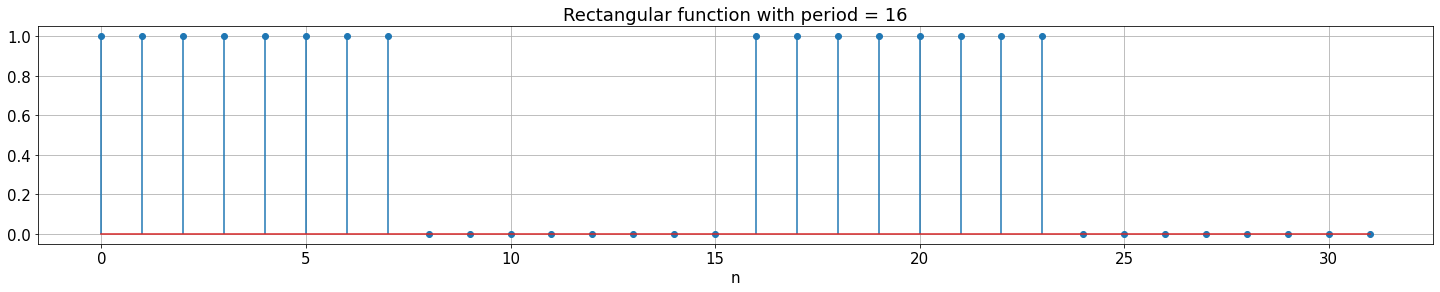

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=16
rnge=2*N
n=np.arange(0,rnge,1)
rect=[]               # a list to store the rectangular signal for 2 time-periods
for i in list(n):
  if (i%16)<8:
    rect.append(1)
  else:
    rect.append(0)
plt.figure(figsize=(25,4))
plt.stem(n,rect,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Rectangular function with period = {N}')
plt.grid()
plt.show()


Yes,  it is possible to compute the DTFS coefficients of the square wave mentioned in Assignment-3 using the function written for DFT.

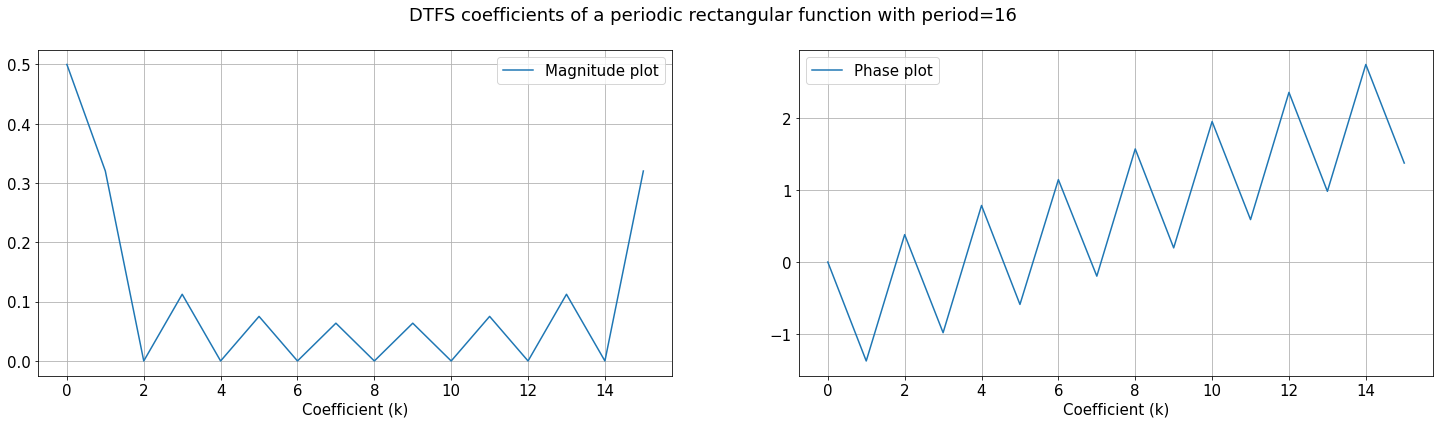

In [ ]:
import cmath

def dtfs(x,N):    # calculating DTFS in terms of DFT
  return dft(x[0:N],N)/N


N=16  
dfs_coeff=dtfs(rect,N)    # calculated dtfs of the rectangular signal
mag=abs(dfs_coeff)    # magnitude spectrum of the dtfs coefficients
ph=[]
for i in list(dfs_coeff):
  ph.append(cmath.phase(i))    # phase spectrum of the dtfs coefficients
ph=np.array(ph)

fig,ax=plt.subplots(1,2,figsize=(25,6))
plt.rcParams.update({'font.size':15})
ax[0].plot(np.arange(0,N,1),mag,label='Magnitude plot')
ax[0].set_xlabel('Coefficient (k)')
ax[0].legend()
ax[0].grid()
ax[1].plot(np.arange(0,N,1),ph,label='Phase plot')
ax[1].set_xlabel('Coefficient (k)')
ax[1].legend()
ax[1].grid()
plt.suptitle('DTFS coefficients of a periodic rectangular function with period=16')

plt.show()

**• Discrete Cosine Transform:** It is used in lossy image compression
because it has very strong energy compaction, i.e., most of the information
is stored in low frequency components of a signal while the other frequency
components have very small information content which can be stored by
using very less number of bits. The general equation for a 1D (N data
items) DCT is defined by the following equation:
X(m) = r
2
N
N
X−1
n=0
x[n]cmcos[
πm
2N
(2n + 1)]
The inverse transform is,
x[n] = r
2
N
N
X−1
m=0
X(m)cmcos[
πm
2N
(2n + 1)]
where,
cm =

√
1
2
for m = 0
1 otherwise
Consider a signal x[n] = [8, 16, 24, 32, 40, 48, 56, 64] of length N = 8. Compute the DCT of this signal. Now keep only the first four DCT coefficients
while discarding the rest and then compare its energy with that of x[n].
Compute the inverse DCT of the sequence obtained and plot it alongside
x[n]. Also compute the mean square error between the two signals.

DCT of x=[8, 16, 24, 32, 40, 48, 56, 64] is 
[ 1.01823376e+02 -5.15385842e+01 -1.06581410e-14 -5.38763841e+00
  0.00000000e+00 -1.60722323e+00 -2.13162821e-14 -4.05618582e-01]

Energy calculated by adding ALL THE squared DCT coefficients Em = 13055.999999999995

Energy calculated by adding FIRST FOUR squared DCT coefficients Em_compr = 13053.252307055178

Energy calculated by adding signal samples En = 13056

IDCT of X[m] is using first 4 coefficients x = [ 8.48602882 15.09915475 24.32540661 32.46926627 39.53073373 47.67459339
 56.90084525 63.51397118]

Mean squared error due to reconstruction with only FIRST FOUR DCT coefficients and the last four as zero = 0.34346161810222803


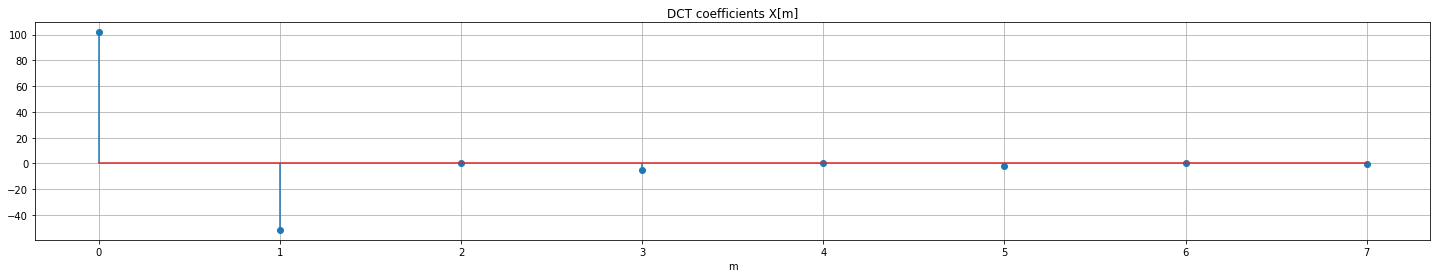

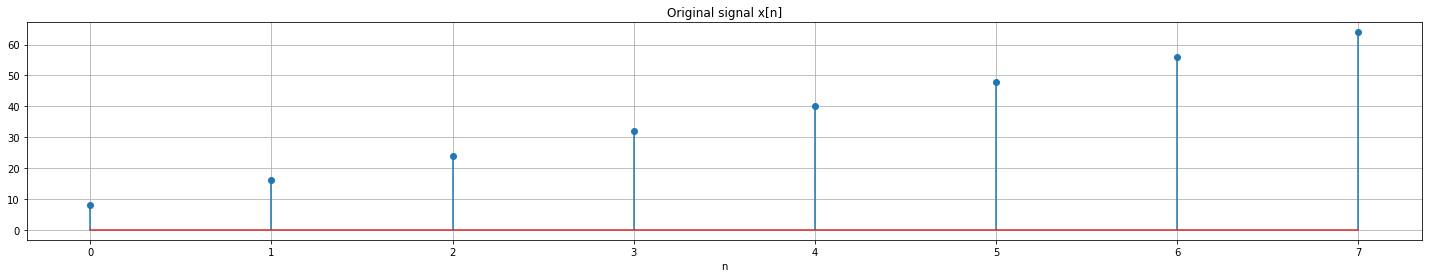

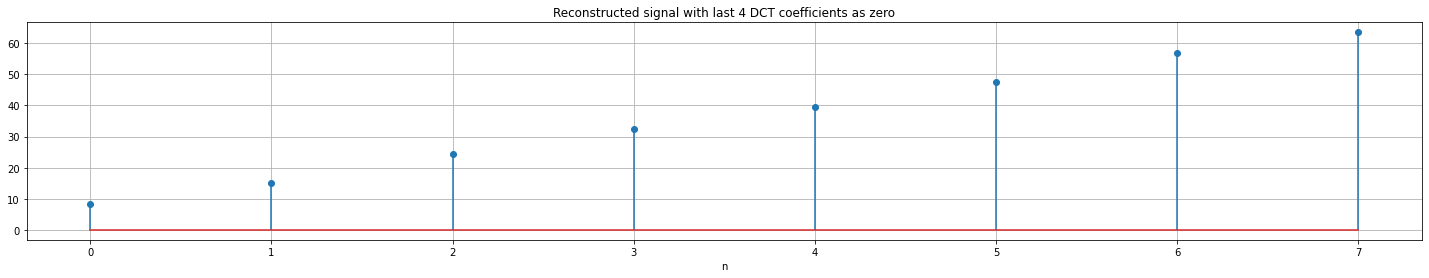

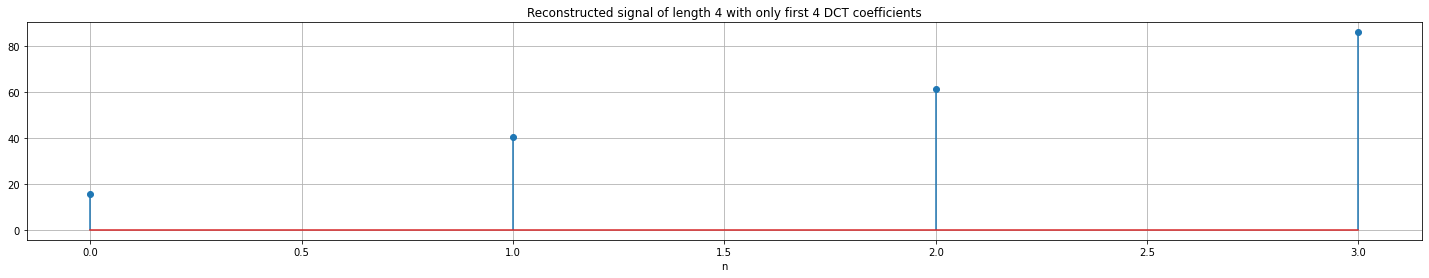

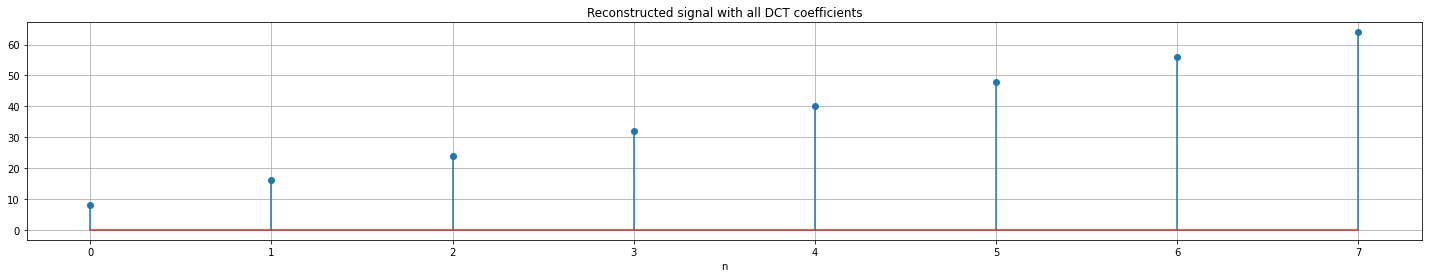

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def dct(x,N):     # returns N-point DCT OF  a  signal x[n]
  num_coeff=N
  dct_coeff=[]    # to store the coefficients
  for m in range(num_coeff):    # calculate the N coefficients one by one
    if m==0:
      cm=1/math.sqrt(2)   # deciding the value of cm based on m
    else:
      cm=1
    sum=0
    for i in range(N):    # summing over the N signal samples
      cos_term=np.cos((np.pi*m*(2*i + 1))/(2*N))  # calculating the cosine term separately
      sum=sum+(x[i]*cm*cos_term)
    dct_coeff.append(sum)   # adding to the list

  dct_coeff=np.array(dct_coeff)
  return dct_coeff*math.sqrt(2/N)   # multiplying by sqrt(2/N)


def idct(Xm,N):   # SIMILAR to dct; only x[n] and X[m] are interchanged
  num_coeff=N
  x=[]
  for i in range(N):
    sum=0
    for m in range(num_coeff):
      if m==0:
        cm=1/math.sqrt(2)
      else:
        cm=1
      cos_term=np.cos((np.pi*m*(2*i + 1))/(2*N))
      sum=sum+(Xm[m]*cm*cos_term)
    x.append(sum)

  x=np.array(x)
  return x*math.sqrt(2/N)

N=8
x=[8, 16, 24, 32, 40, 48, 56, 64]
Xm=dct(x,N)
print(f'DCT of x={x} is ')
print(Xm)
print()

#FINDING THE ENERGY FOR DIFFERNT SIGNALS AND TRANSFORMS
E=0
for i in range(N):
  E=E+(Xm[i])**2 
print(f'Energy calculated by adding ALL THE squared DCT coefficients Em = {E}')
print()

E=0
for i in range(int(N/2)):
  E=E+(Xm[i])**2 
print(f'Energy calculated by adding FIRST FOUR squared DCT coefficients Em_compr = {E}')
print()

E=0
for i in range(int(N)):
  E=E+(x[i])**2 
print(f'Energy calculated by adding signal samples En = {E}')
print()

recon_x=idct(list(Xm[0:4])+[0]*4 , N)   # reconstructing x[n] from just first 4   DCT coefficients
print(f'IDCT of X[m] is using first 4 coefficients x = {recon_x}')
print()

mse=0
for i in range(N):
  mse = mse + (recon_x[i] - x[i])**2    #calculating the mean square error between original and reconstructed x[n]
print(f'Mean squared error due to reconstruction with only FIRST FOUR DCT coefficients and the last four as zero = {mse/N}')

n=np.arange(0,N,1)
plt.figure(figsize=(25,4))
plt.stem(n,Xm,use_line_collection=True)
plt.xlabel('m')
plt.title(f'DCT coefficients X[m]')
plt.grid()
plt.show()

n=np.arange(0,N,1)
plt.figure(figsize=(25,4))
plt.stem(n,x,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Original signal x[n]')
plt.grid()
plt.show()

n=np.arange(0,N,1)
plt.figure(figsize=(25,4))
plt.stem(n,recon_x,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Reconstructed signal with last 4 DCT coefficients as zero')
plt.grid()
plt.show()

recon_x4=idct(list(Xm[0:4]),int(N/2))
n=np.arange(0,N/2,1)
plt.figure(figsize=(25,4))
plt.stem(n,recon_x4,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Reconstructed signal of length {int(N/2)} with only first 4 DCT coefficients')
plt.grid()
plt.show()


n=np.arange(0,N,1)
plt.figure(figsize=(25,4))
plt.stem(n,idct(Xm,N),use_line_collection=True)
plt.xlabel('n')
plt.title(f'Reconstructed signal with all DCT coefficients')
plt.grid()
plt.show()

Now repeat the same process with DFT and compare the mean square
errors. Comment on your observations.

DFT of x=[8, 16, 24, 32, 40, 48, 56, 64] is 
[288.+0.00000000e+00j -32.+7.72548340e+01j -32.+3.20000000e+01j
 -32.+1.32548340e+01j -32.-1.13686838e-13j -32.-1.32548340e+01j
 -32.-3.20000000e+01j -32.-7.72548340e+01j]

Energy calculated by adding ALL THE squared DFT coefficients Em = 104448.0

Energy calculated by adding FIRST FOUR squared DFT coefficients Em_compr = 93184.00000000001

Energy calculated by adding signal samples En = 13056

IDFT of X[m] is x using first 4 coefficients = [24.+15.3137085j 24. -4.j        32. -4.j        32. -7.3137085j
 40. -7.3137085j 40. -4.j        48. -4.j        48.+15.3137085j]

Mean squared error due to reconstruction with only FIRST FOUR DFT coefficients and the last four as zero = 15.999999999999936


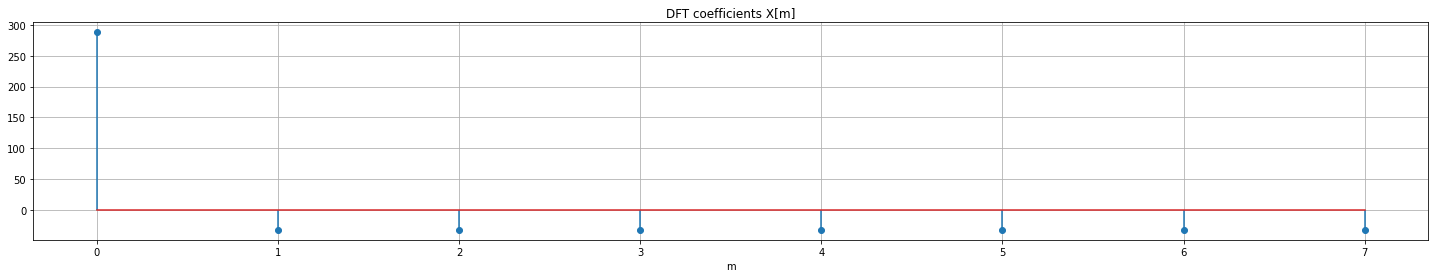

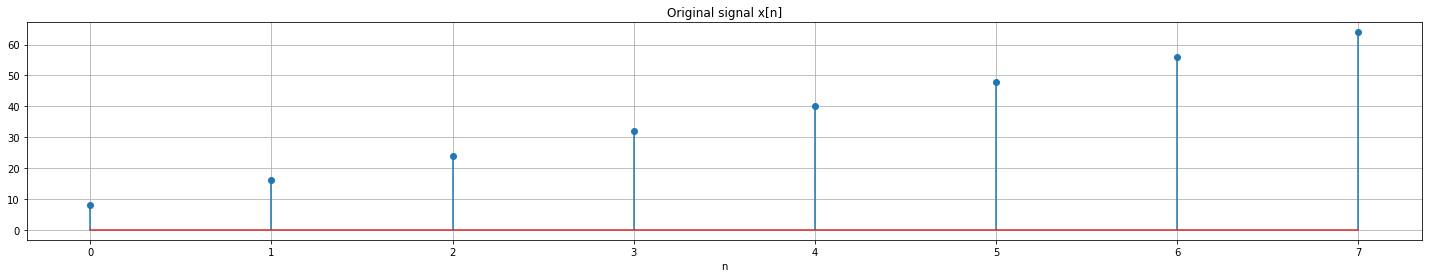

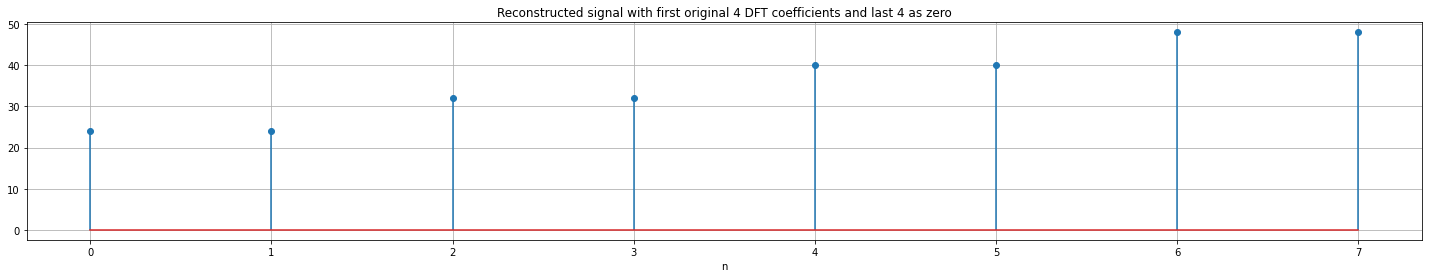

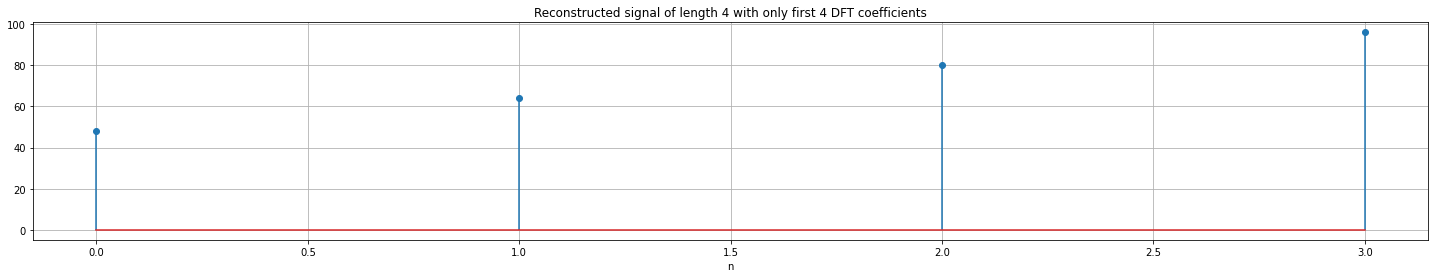

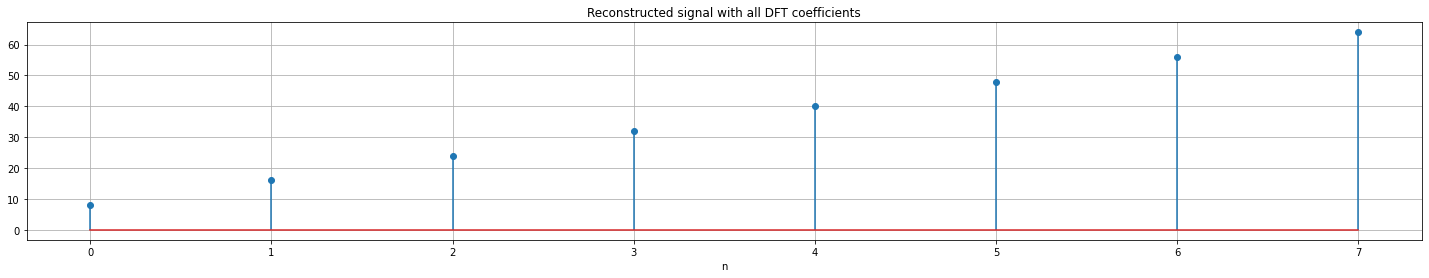

In [ ]:

N=8
x=[8, 16, 24, 32, 40, 48, 56, 64]
Xm=dft(x,N)
print(f'DFT of x={x} is ')
print(Xm)
print()

#FINDING THE ENERGY FOR DIFFERNT SIGNALS AND TRANSFORMS
E=0
for i in range(N):
  E=E+abs(Xm[i])**2 
print(f'Energy calculated by adding ALL THE squared DFT coefficients Em = {E}')
print()

E=0
for i in range(int(N/2)):
  E=E+abs(Xm[i])**2 
print(f'Energy calculated by adding FIRST FOUR squared DFT coefficients Em_compr = {E}')
print()

E=0
for i in range(int(N)):
  E=E+(x[i])**2 
print(f'Energy calculated by adding signal samples En = {E}')
print()

recon_x=idft(list(Xm[0:4])+[0]*4,N)   # reconstructing x[n] from just first 4   DFT coefficients
print(f'IDFT of X[m] is x using first 4 coefficients = {recon_x}')
print()

mse=0
for i in range(N):
  mse = mse + (recon_x[i] - x[i])**2       #calculating the mean square error between original and reconstructed x[n]
print(f'Mean squared error due to reconstruction with only FIRST FOUR DFT coefficients and the last four as zero = {abs(mse/N)}')

n=np.arange(0,N,1)
plt.figure(figsize=(25,4))
plt.stem(n,Xm.real,use_line_collection=True)
plt.xlabel('m')
plt.title(f'DFT coefficients X[m]')
plt.grid()
plt.show()

n=np.arange(0,N,1)
plt.figure(figsize=(25,4))
plt.stem(n,x,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Original signal x[n]')
plt.grid()
plt.show()

n=np.arange(0,N,1)
plt.figure(figsize=(25,4))
plt.stem(n,recon_x.real,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Reconstructed signal with first original 4 DFT coefficients and last 4 as zero')
plt.grid()
plt.show()

recon_x4=idft(list(Xm[0:4]),int(N/2))
n=np.arange(0,N/2,1)
plt.figure(figsize=(25,4))
plt.stem(n,recon_x4.real,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Reconstructed signal of length {int(N/2)} with only first 4 DFT coefficients')
plt.grid()
plt.show()


n=np.arange(0,N,1)
plt.figure(figsize=(25,4))
plt.stem(n,idft(Xm,N).real,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Reconstructed signal with all DFT coefficients')
plt.grid()
plt.show()

**Conclusion:** The MSE for reconstruction of x[n] using first four DCT coefficients is 0.34346161810222803, while that using first four DFT coefficients is 15.9999 or practically 16. So the error is almost 45-50 times more for DFT. This shows that DCT compresses the data much more efficiently since it has sufficiently enough information about the sequence x[n] in just 50% (4 out of 8) of its coefficients to reconstruct the signal with reasonable accuracy. 